In [1]:
import numpy as np
import pandas as pd

 Длая начала загрузим таблицу country_vaccinations.csv и выведем в ней первые 5 строк

In [2]:
vaccinations = pd.read_csv('country_vaccinations.csv')
vaccinations.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Algeria,DZA,2021-01-29,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
1,Algeria,DZA,2021-01-30,30.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
2,Andorra,AND,2021-01-25,576.0,576.0,NaN,NaN,NaN,0.75,0.75,NaN,NaN,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
3,Andorra,AND,2021-01-26,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
4,Andorra,AND,2021-01-27,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...


In [3]:
num_rows, num_features = vaccinations.shape
print(f'Размер нашего датасета: число записей {num_rows}, число признаков {num_features}')

Размер нашего датасета: число записей 2555, число признаков 15


**COVID-19 World Vaccination Progress** 

Таблица `country_vaccinations.csv` содержит следующую информацию о вакцинации: 

*   `country`: страна
*   `iso_code`: ISO код страны
*   `date`: дата ввода данных
*   `total_vaccinations`: абсолютное количество прививок в стране
*   `people_vaccinated`: человек, в зависимости от схемы иммунизации, получит одну или несколько (обычно 2) вакцины
*   `people_fully_vaccinated`: количество людей, получивших полный набор прививок согласно схеме иммунизации (обычно 2)
*   `daily_vaccinations_raw`: количество вакцинаций на эту дату
*   `daily_vaccinations`: количество вакцинаций на эту дату
*   `total_vaccinations_per_hundred`: соотношение (в процентах) между количеством вакцинированных и общей численностью населения на текущий момент в стране
*   `people_vaccinated_per_hundred`: соотношение (в процентах) между иммунизированным населением и общей численностью населения на данный момент в стране

In [4]:
print('Заполняемость данных')
flags = vaccinations.isna()
flags.sum() / vaccinations.shape[0]

Заполняемость данных


country                                0.000000
iso_code                               0.092759
date                                   0.000000
total_vaccinations                     0.347554
people_vaccinated                      0.469667
people_fully_vaccinated                0.684932
daily_vaccinations_raw                 0.464579
daily_vaccinations                     0.037965
total_vaccinations_per_hundred         0.347554
people_vaccinated_per_hundred          0.469667
people_fully_vaccinated_per_hundred    0.684932
daily_vaccinations_per_million         0.037965
vaccines                               0.000000
source_name                            0.000000
source_website                         0.000000
dtype: float64

## Население стран

В датасете есть 4 пары колонок - `daily_vaccinations` c `daily_vaccinations_per_million`, `total_vaccinations` c `total_vaccinations_per_hundred` и `people_vaccinated` с `people_vaccinated_per_hundred`, `people_fully_vaccinated` с `people_fully_vaccinated_per_hundred`, значения в которых прямо пропорциональны друг другу и коэффициент пропорциональности связан с населением государства. С помощью этих колонок мы можем оценить население и, при заполнении пропусков, заполнять только одну из двух колонок (а вторую заполнять используя прямую пропорциональность).

In [5]:
COLUMN_PAIRS = [
    ('daily_vaccinations', 'daily_vaccinations_per_million', 1e6),
    ('total_vaccinations', 'total_vaccinations_per_hundred', 100),
    ('people_vaccinated', 'people_vaccinated_per_hundred', 100),
    ('people_fully_vaccinated', 'people_fully_vaccinated_per_hundred', 100)
]

dfs = []
for nom, denom, mult in COLUMN_PAIRS:
    df = vaccinations[['country', nom, denom]].dropna()
    df['population'] = (df[nom] / df[denom]) * mult
    df = df.drop(columns=[nom, denom]).replace([np.inf, -np.inf], np.nan).dropna()
    dfs.append(df)
    
population = pd.concat(dfs)

In [6]:
population.head()

,country,population
1,Algeria,3.000000e+07
3,Andorra,7.728337e+04
4,Andorra,7.728337e+04
5,Andorra,7.728337e+04
6,Andorra,7.728337e+04


In [7]:
population_mean = population.groupby('country').mean()
population_mean = {
    country: population[0]
    for country, population in zip(population_mean.index, population_mean.values)
}

population_mean

{'Algeria': 30000000.0,
 'Andorra': 77200.9520208199,
 'Argentina': 45123188.21164181,
 'Austria': 8984106.187045515,
 'Bahrain': 1701570.5120426612,
 'Bangladesh': 161122457.03014934,
 'Belgium': 11213888.00350198,
 'Bermuda': 62277.85002810513,
 'Bolivia': 12009033.224400872,
 'Brazil': 210667680.37306544,
 'Bulgaria': 6935279.44185545,
 'Canada': 37829002.34185554,
 'Cayman Islands': 65726.93613698632,
 'Chile': 19201532.63086156,
 'China': 1442524078.5830615,
 'Costa Rica': 5089941.979311699,
 'Croatia': 4106384.1258594263,
 'Cyprus': 876325.4532566043,
 'Czechia': 10715633.40887005,
 'Denmark': 5804330.625414432,
 'Ecuador': 17085221.116411086,
 'Egypt': 109500000.0,
 'England': 56236982.037986316,
 'Estonia': 1323061.7540125977,
 'Faeroe Islands': 48863.2330522679,
 'Finland': 5534459.8175375145,
 'France': 67115818.70734851,
 'Germany': 83960596.53737262,
 'Gibraltar': 33688.41265732025,
 'Greece': 10452072.449501233,
 'Greenland': 56791.208791208795,
 'Guernsey': 67021.94331554

Проверим, насколько точна оценка.

In [8]:
import math

isclose = population.apply(
    lambda row: math.isclose(
        row['population'], population_mean[row['country']],
        rel_tol=0.05
    ),
    axis=1
)

isclose.sum() / len(isclose)

0.9557249432371067

In [9]:
assert all(country in population_mean for country in vaccinations['country'].unique())

## Число вакцинаций

В таблице присутствует колонка `total_vaccinations`, которая является кумулятивной суммой `daily_vaccinations_raw` за весь период времени:

In [10]:
from datetime import date, timedelta

columns = ['country', 'date', 'total_vaccinations', 'daily_vaccinations', 'daily_vaccinations_raw']
total_vaccinations = vaccinations[columns].dropna()

# total_vaccinations yesterday, daily_vaccinations_raw today, total_vaccinations today
tv_yda, dvr_tda, tv_tda = [], [], []
for _, country in total_vaccinations.groupby('country'):
    for (_, yda), (_, tda) in zip(country[:-1].iterrows(), country[1:].iterrows()):
        yda_date = date.fromisoformat(yda['date'])
        tda_date = date.fromisoformat(tda['date'])
        if yda_date + timedelta(days=1) != tda_date:
            continue
            
        tv_yda.append(yda['total_vaccinations'])
        dvr_tda.append(tda['daily_vaccinations_raw'])
        tv_tda.append(tda['total_vaccinations'])
        
tv_yda, dvr_tda, tv_tda = np.array(tv_yda), np.array(dvr_tda), np.array(tv_tda)
print(f'Found {len(tv_tda)} examples')

tv_tda_pred = tv_yda + dvr_tda
if np.sum(np.abs(tv_tda - tv_tda_pred)) > 0:
    print(f'Mean error is {np.mean(np.abs(tv_tda - tv_tda_pred))}')
else:
    print(f'There is not error')

Found 1244 examples
There is not error


Таким образом мы можем восстановить часть `total_vaccinations`, если известны `total_vaccinations` для предыдущего дня и `daily_vaccinations_raw` для текущего:

In [11]:
row = vaccinations.loc[3]
math.isnan(row['total_vaccinations'])

True

In [12]:
isna = vaccinations['total_vaccinations'].isna()
isna_indices = isna[isna].index.values

for i in isna_indices:
    yda = vaccinations.loc[i - 1]
    tda = vaccinations.loc[i]
    if yda['country'] != tda['country'] and not math.isnan(tda['daily_vaccinations_raw']):
        vaccinations.at[i, 'total_vaccinations'] = tda['daily_vaccinations_raw']
        continue
        
    yda_date = date.fromisoformat(yda['date'])
    tda_date = date.fromisoformat(tda['date'])
    if yda_date + timedelta(days=1) != tda_date:
        continue
    
    if math.isnan(yda['total_vaccinations']) or math.isnan(tda['daily_vaccinations_raw']):
        continue
    
    data.at[i, 'total_vaccinations'] = yda['total_vaccinations'] + tda['daily_vaccinations_raw']

Однако, это не сильно помогает, так как и `total_vaccinations` и `daily_vaccinations_raw` содержат много пропусков. Попробуем восстановить `daily_vaccinations_raw` через `daily_vaccinations`:

In [13]:
daily_vaccinations = vaccinations[['daily_vaccinations', 'daily_vaccinations_raw']].dropna()
ratio = (daily_vaccinations['daily_vaccinations_raw'] / daily_vaccinations['daily_vaccinations']).mean()
ratio

1.211819784661889

In [14]:
isna = vaccinations['daily_vaccinations_raw'].isna()
isna_indices = isna[isna].index.values

for i in isna_indices:
    daily_vaccinations = vaccinations.at[i, 'daily_vaccinations']
    if math.isnan(daily_vaccinations):
        continue
    
    vaccinations.at[i, 'daily_vaccinations_raw'] = ratio * daily_vaccinations

Теперь мы можем снова попытаться восстановить `total_vaccinations` с помощью `daily_vaccinations_raw`:

In [15]:
isna = vaccinations['total_vaccinations'].isna()
isna_indices = isna[isna].index.values

for i in isna_indices:
    yda = vaccinations.loc[i - 1]
    tda = vaccinations.loc[i]
    # records are sorted by country and date
    # when country changes, it means that it is the 1st day of vaccinations
    if yda['country'] != tda['country'] and not math.isnan(tda['daily_vaccinations_raw']):
        vaccinations.at[i, 'total_vaccinations'] = tda['daily_vaccinations_raw']
        vaccinations.at[i, 'total_vaccinations_per_hundred'] = int(
            vaccinations.at[i, 'total_vaccinations'] / (population_mean[vaccinations.at[i, 'country']] / 100)
        )
        continue
        
    yda_date = date.fromisoformat(yda['date'])
    tda_date = date.fromisoformat(tda['date'])
    if yda_date + timedelta(days=1) != tda_date:
        continue
    
    if math.isnan(yda['total_vaccinations']) or math.isnan(tda['daily_vaccinations_raw']):
        continue
    
    vaccinations.at[i, 'total_vaccinations'] = yda['total_vaccinations'] + tda['daily_vaccinations_raw']
    vaccinations.at[i, 'total_vaccinations_per_hundred'] = int(
        vaccinations.at[i, 'total_vaccinations'] / (population_mean[vaccinations.at[i, 'country']] / 100)
    )

In [16]:
flags = vaccinations.isna()
flags.sum() / len(vaccinations)

country                                0.000000
iso_code                               0.092759
date                                   0.000000
total_vaccinations                     0.006654
people_vaccinated                      0.469667
people_fully_vaccinated                0.684932
daily_vaccinations_raw                 0.037965
daily_vaccinations                     0.037965
total_vaccinations_per_hundred         0.006654
people_vaccinated_per_hundred          0.469667
people_fully_vaccinated_per_hundred    0.684932
daily_vaccinations_per_million         0.037965
vaccines                               0.000000
source_name                            0.000000
source_website                         0.000000
dtype: float64

Как видно, нам удалось восстановить почти всю колонку `total_vaccinatoins`. Остальные значения уже так просто восстановить не получится. Для этого нужно восстановить значение `daily_vaccinations_raw`. Чтобы сделать это, воспользуемся тем, что `daily_vaccinations_raw` может быть восстановлен из `daily_vaccinations`, которое в свою очередь может быть восстановлено из `daily_vaccinations_per_million` через уже посчитанное население. `daily_vaccinations_per_million` уже не настолько волатильное значение и, кажется, его можно заполнить просто средним по таблице значением для данной даты.

In [17]:
isna = vaccinations['daily_vaccinations_per_million'].isna()
isna_indices = isna[isna].index.values

for i in isna_indices:
    current_date = vaccinations.at[i, 'date']
    mean = vaccinations[vaccinations['date'] == current_date]['daily_vaccinations_per_million'].mean()
    if math.isnan(mean):
        continue
    
    vaccinations.at[i, 'daily_vaccinations_per_million'] = int(mean)
    vaccinations.at[i, 'daily_vaccinations'] = int(
        vaccinations.at[i, 'daily_vaccinations_per_million'] * (
            population_mean[vaccinations.at[i, 'country']] / 1e6
        )
    )

In [18]:
flags = vaccinations.isna()
flags.sum() / len(vaccinations)

country                                0.000000
iso_code                               0.092759
date                                   0.000000
total_vaccinations                     0.006654
people_vaccinated                      0.469667
people_fully_vaccinated                0.684932
daily_vaccinations_raw                 0.037965
daily_vaccinations                     0.001957
total_vaccinations_per_hundred         0.006654
people_vaccinated_per_hundred          0.469667
people_fully_vaccinated_per_hundred    0.684932
daily_vaccinations_per_million         0.001957
vaccines                               0.000000
source_name                            0.000000
source_website                         0.000000
dtype: float64

Мы видим, что все еще остаются строки с незаполненным `daily_vaccinations_per_million`. Посмотрим на них.

In [19]:
vaccinations[vaccinations['daily_vaccinations_per_million'].isna()]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
694,England,NaN,2020-12-13,55295.0,55295.0,NaN,NaN,NaN,0.10,0.10,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
1639,Northern Ireland,NaN,2020-12-13,3623.0,3623.0,NaN,NaN,NaN,0.19,0.19,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
1980,Scotland,NaN,2020-12-13,18996.0,18996.0,NaN,NaN,NaN,0.35,0.35,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
2390,United Kingdom,GBR,2020-12-13,86095.0,86095.0,NaN,NaN,NaN,0.13,0.13,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
2498,Wales,NaN,2020-12-13,8181.0,8181.0,NaN,NaN,NaN,0.26,0.26,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


Все такие строки происходят из Великобритании и все за одну единственную дату. Что же это за дата?

In [20]:
vaccinations[vaccinations['country'] == 'England'].head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
694,England,NaN,2020-12-13,55295.000000,55295.0,NaN,NaN,NaN,0.1,0.1,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
695,England,NaN,2020-12-14,144972.087705,NaN,NaN,89677.087705,74002.0,0.0,NaN,NaN,1315.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
696,England,NaN,2020-12-15,234649.175409,NaN,NaN,89677.087705,74002.0,0.0,NaN,NaN,1315.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
697,England,NaN,2020-12-16,324326.263114,NaN,NaN,89677.087705,74002.0,0.0,NaN,NaN,1315.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
698,England,NaN,2020-12-17,414003.350818,NaN,NaN,89677.087705,74002.0,0.0,NaN,NaN,1315.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


Судя по всему это просто дата начала вакцинации и здесь daily_vaccinations просто равна total_vaccinations. Это легко исправить.

In [21]:
isna = vaccinations['daily_vaccinations_per_million'].isna()
isna_indices = isna[isna].index.values

for i in isna_indices:
    vaccinations.at[i, 'daily_vaccinations'] = vaccinations.at[i, 'total_vaccinations']
    vaccinations.at[i, 'daily_vaccinations_per_million'] = int(
        vaccinations.at[i, 'daily_vaccinations'] / (population_mean[vaccinations.at[i, 'country']] / 1e6)
    )

In [22]:
isna = vaccinations['daily_vaccinations_raw'].isna()
isna_indices = isna[isna].index.values

for i in isna_indices:
    daily_vaccinations = vaccinations.at[i, 'daily_vaccinations']
    if math.isnan(daily_vaccinations):
        continue
    
    vaccinations.at[i, 'daily_vaccinations_raw'] = ratio * daily_vaccinations

In [23]:
isna = vaccinations['total_vaccinations'].isna()
isna_indices = isna[isna].index.values

for i in isna_indices:
    yda = vaccinations.loc[i - 1]
    tda = vaccinations.loc[i]
    # records are sorted by country and date
    # when country changes, it means that it is the 1st day of vaccinations
    if yda['country'] != tda['country'] and not math.isnan(tda['daily_vaccinations_raw']):
        vaccinations.at[i, 'total_vaccinations'] = tda['daily_vaccinations_raw']
        vaccinations.at[i, 'total_vaccinations_per_hundred'] = int(
            vaccinations.at[i, 'total_vaccinations'] / (population_mean[vaccinations.at[i, 'country']] / 100)
        )
        continue
        
    yda_date = date.fromisoformat(yda['date'])
    tda_date = date.fromisoformat(tda['date'])
    if yda_date + timedelta(days=1) != tda_date:
        continue
    
    if math.isnan(yda['total_vaccinations']) or math.isnan(tda['daily_vaccinations_raw']):
        continue
    
    vaccinations.at[i, 'total_vaccinations'] = yda['total_vaccinations'] + tda['daily_vaccinations_raw']
    vaccinations.at[i, 'total_vaccinations_per_hundred'] = int(
        vaccinations.at[i, 'total_vaccinations'] / (population_mean[vaccinations.at[i, 'country']] / 100)
    )

In [24]:
flags = vaccinations.isna()
flags.sum() / len(vaccinations)

country                                0.000000
iso_code                               0.092759
date                                   0.000000
total_vaccinations                     0.005479
people_vaccinated                      0.469667
people_fully_vaccinated                0.684932
daily_vaccinations_raw                 0.000000
daily_vaccinations                     0.000000
total_vaccinations_per_hundred         0.005479
people_vaccinated_per_hundred          0.469667
people_fully_vaccinated_per_hundred    0.684932
daily_vaccinations_per_million         0.000000
vaccines                               0.000000
source_name                            0.000000
source_website                         0.000000
dtype: float64

Видим, что все еще не все `total_vaccinations` удалось заполнить таким образом. Посмотрим, что за строки остались пустыми:

In [25]:
vaccinations[vaccinations['total_vaccinations'].isna()]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
1335,Latvia,LVA,2021-01-04,NaN,2960.0,NaN,1963.148051,1620.0,NaN,0.16,NaN,858.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",National Health Service,https://data.gov.lv/dati/eng/dataset/covid19-v...
1336,Latvia,LVA,2021-01-05,NaN,3849.0,NaN,2037.069058,1681.0,NaN,0.20,NaN,890.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",National Health Service,https://data.gov.lv/dati/eng/dataset/covid19-v...
1337,Latvia,LVA,2021-01-06,NaN,4625.0,NaN,2284.280294,1885.0,NaN,0.25,NaN,998.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",National Health Service,https://data.gov.lv/dati/eng/dataset/covid19-v...
1338,Latvia,LVA,2021-01-07,NaN,5434.0,NaN,2400.614993,1981.0,NaN,0.29,NaN,1049.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",National Health Service,https://data.gov.lv/dati/eng/dataset/covid19-v...
1339,Latvia,LVA,2021-01-08,NaN,6339.0,NaN,2632.072572,2172.0,NaN,0.34,NaN,1150.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",National Health Service,https://data.gov.lv/dati/eng/dataset/covid19-v...
1340,Latvia,LVA,2021-01-09,NaN,6644.0,NaN,2722.959056,2247.0,NaN,0.35,NaN,1190.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",National Health Service,https://data.gov.lv/dati/eng/dataset/covid19-v...
1341,Latvia,LVA,2021-01-10,NaN,6980.0,NaN,2941.086617,2427.0,NaN,0.37,NaN,1285.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",National Health Service,https://data.gov.lv/dati/eng/dataset/covid19-v...
1342,Latvia,LVA,2021-01-11,NaN,8346.0,NaN,4288.630218,3539.0,NaN,0.44,NaN,1874.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",National Health Service,https://data.gov.lv/dati/eng/dataset/covid19-v...
1343,Latvia,LVA,2021-01-12,NaN,9973.0,NaN,4334.679370,3577.0,NaN,0.53,NaN,1894.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",National Health Service,https://data.gov.lv/dati/eng/dataset/covid19-v...
1344,Latvia,LVA,2021-01-13,NaN,11480.0,NaN,4394.058539,3626.0,NaN,0.61,NaN,1920.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",National Health Service,https://data.gov.lv/dati/eng/dataset/covid19-v...


Это - серия записей из Латвии, причем подряд идущих. Почему же их не удалось заполнить нашему алгоритму?

In [26]:
vaccinations[vaccinations['country'] == 'Latvia'].head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
1332,Latvia,LVA,2020-12-28,2075.847291,595.0,NaN,2075.847291,1713.0,0.0,0.03,NaN,907.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",National Health Service,https://data.gov.lv/dati/eng/dataset/covid19-v...
1333,Latvia,LVA,2020-12-29,3910.542445,1468.0,NaN,1834.695154,1514.0,0.0,0.08,NaN,802.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",National Health Service,https://data.gov.lv/dati/eng/dataset/covid19-v...
1334,Latvia,LVA,2020-12-30,5809.464048,2261.0,NaN,1898.921603,1567.0,0.0,0.12,NaN,830.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",National Health Service,https://data.gov.lv/dati/eng/dataset/covid19-v...
1335,Latvia,LVA,2021-01-04,NaN,2960.0,NaN,1963.148051,1620.0,NaN,0.16,NaN,858.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",National Health Service,https://data.gov.lv/dati/eng/dataset/covid19-v...
1336,Latvia,LVA,2021-01-05,NaN,3849.0,NaN,2037.069058,1681.0,NaN,0.20,NaN,890.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",National Health Service,https://data.gov.lv/dati/eng/dataset/covid19-v...


Ага! Вот в чем дело - между 30 декабря и 4 января пропуск в записях. После этого уже идут провалы. Однако это не сложно исправить - пропущены 4 дня и, если обратить внимание на `daily_vaccinations`, то это число равномерно растет от 1500 30 декабря до 4000 17 декабря. Имеет смысл предположить, что с 30 декабря по 4 января все 4 дня в среднем выполняли по `(1567 + 1620) / 2 = 1593` вакцинации. Тогда:

In [27]:
vaccinations.at[1335, 'total_vaccinations'] = vaccinations.at[1334, 'total_vaccinations'] + 4 * 1593
vaccinations.at[1335, 'total_vaccinations_per_hundred'] = vaccinations.at[1335, 'total_vaccinations'] / (
    population_mean['Latvia'] / 100
)

In [28]:
isna = vaccinations['total_vaccinations'].isna()
isna_indices = isna[isna].index.values

for i in isna_indices:
    yda = vaccinations.loc[i - 1]
    tda = vaccinations.loc[i]
    # records are sorted by country and date
    # when country changes, it means that it is the 1st day of vaccinations
    if yda['country'] != tda['country'] and not math.isnan(tda['daily_vaccinations_raw']):
        vaccinations.at[i, 'total_vaccinations'] = tda['daily_vaccinations_raw']
        vaccinations.at[i, 'total_vaccinations_per_hundred'] = int(
            vaccinations.at[i, 'total_vaccinations'] / (population_mean[vaccinations.at[i, 'country']] / 100)
        )
        continue
        
    yda_date = date.fromisoformat(yda['date'])
    tda_date = date.fromisoformat(tda['date'])
    if yda_date + timedelta(days=1) != tda_date:
        continue
    
    if math.isnan(yda['total_vaccinations']) or math.isnan(tda['daily_vaccinations_raw']):
        continue
    
    vaccinations.at[i, 'total_vaccinations'] = yda['total_vaccinations'] + tda['daily_vaccinations_raw']
    vaccinations.at[i, 'total_vaccinations_per_hundred'] = int(
        vaccinations.at[i, 'total_vaccinations'] / (population_mean[vaccinations.at[i, 'country']] / 100)
    )

In [29]:
flags = vaccinations.isna()
flags.sum() / len(vaccinations)

country                                0.000000
iso_code                               0.092759
date                                   0.000000
total_vaccinations                     0.000000
people_vaccinated                      0.469667
people_fully_vaccinated                0.684932
daily_vaccinations_raw                 0.000000
daily_vaccinations                     0.000000
total_vaccinations_per_hundred         0.000000
people_vaccinated_per_hundred          0.469667
people_fully_vaccinated_per_hundred    0.684932
daily_vaccinations_per_million         0.000000
vaccines                               0.000000
source_name                            0.000000
source_website                         0.000000
dtype: float64

Таким образом нам удалось полностью избавиться от пропусков в колонках `daily_*` и `total_vaccinations`.

In [30]:
vaccinations.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Algeria,DZA,2021-01-29,0.000000,NaN,NaN,91940.767062,75870.0,0.00,NaN,NaN,2529.0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
1,Algeria,DZA,2021-01-30,30.000000,NaN,NaN,30.000000,30.0,0.00,NaN,NaN,1.0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
2,Andorra,AND,2021-01-25,576.000000,576.0,NaN,227.822120,188.0,0.75,0.75,NaN,2444.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
3,Andorra,AND,2021-01-26,655.980106,NaN,NaN,79.980106,66.0,0.00,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
4,Andorra,AND,2021-01-27,735.960212,NaN,NaN,79.980106,66.0,0.00,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...


Рассмотрим столбец `iso_code`.

In [31]:
print("Страны, у которых отсутствует iso_code:\n\n", vaccinations[vaccinations.iso_code.isna()].country.value_counts())

Страны, у которых отсутствует iso_code:

 Northern Ireland    57
Wales               57
Scotland            57
England             57
Northern Cyprus      9
Name: country, dtype: int64


**Iso_code отсутствует у стран, которые входят в состав одного государства (Северная Ирландия, Англия, Шотландия, Уэльс, входящие в состав Соединенного Королевства), а также у Северного Кипра, который признан только Турцией (остальной мир признает на данной территории власть Республики Кипр). Для простоты оставим только данные о Соединенном Королевстве**

In [32]:
def is_it_uk(country):
    return (country == 'England') | (country == 'Scotland') | (country == 'Wales') | (country == 'Northern Ireland')

In [33]:
data_wo_gb = vaccinations.drop(vaccinations[is_it_uk(vaccinations.country)].index)

In [34]:
import matplotlib.pyplot as plt
import matplotlib

daily_vaccinations = pd.DataFrame(data_wo_gb.groupby('date').daily_vaccinations.sum())
daily_vaccinations.plot()
plt.show()

<Figure size 640x480 with 1 Axes>

**Заметим, что под конец наблюдений наблюдается спад числа вакцинаций. Это может быть связано с нехваткой вакцин или со снижением заболеваемости (если посмотреть на официальную статистику по covid-19)**

Посмотрим, когда началась вакцинация в разных странах.

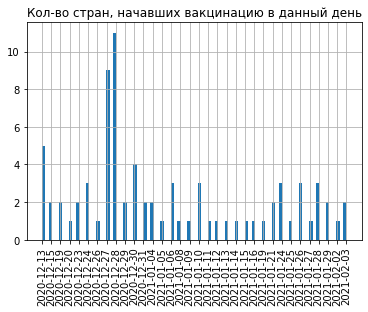

In [35]:
vaccinations.groupby('country').date.min().sort_values().hist(xrot=90, bins=90)
plt.title('Кол-во стран, начавших вакцинацию в данный день')
plt.show()

In [36]:
vaccinations.groupby('country').total_vaccinations.max()

country
Algeria                 3.000000e+01
Andorra                 1.055881e+03
Argentina               5.115820e+05
Austria                 2.831970e+05
Bahrain                 2.011160e+05
                            ...     
Turkey                  2.664203e+06
United Arab Emirates    4.413649e+06
United Kingdom          1.280659e+07
United States           4.241762e+07
Wales                   6.067680e+05
Name: total_vaccinations, Length: 80, dtype: float64

**На графике видно, что 27 и 28 декабря четверть стран (20 из 80) начала вакцинацию в этот день. В целом почти каждый день начинает вакцинацию одна страна.**

## Вакцины

In [37]:
vaccines = set()
for vacs in np.unique(data_wo_gb.vaccines):
    for vac in vacs.split(', '):
        vaccines.add(vac)   

In [38]:
"На рынке представлены следующие вакцины: {}".format(", ".join(vaccines))

'На рынке представлены следующие вакцины: Moderna, Sinovac, Sputnik V, Covaxin, Pfizer/BioNTech, Sinopharm/Wuhan, Sinopharm/Beijing, Oxford/AstraZeneca'

Попробуем понять, какая вакцина является одноэтапной и двухэтапной на основании имеющихся данных

Разница столбцов total_vaccinations_per_hundred и people_vaccinated_per_hundred


Text(0, 0.5, 'Количество строчек')

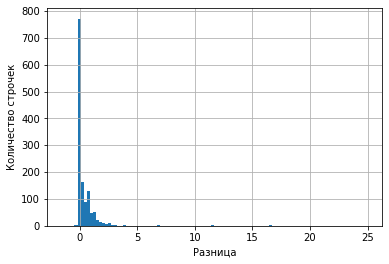

In [39]:
print("Разница столбцов total_vaccinations_per_hundred и people_vaccinated_per_hundred")
has_total_vaccinations = vaccinations[~vaccinations['people_vaccinated_per_hundred'].isna()]
ax = (has_total_vaccinations['total_vaccinations_per_hundred'] - has_total_vaccinations['people_vaccinated_per_hundred']).hist(bins=100)
ax.set_xlabel('Разница')
ax.set_ylabel('Количество строчек')

Разница столбца total_vaccinations_per_hundred и суммы столбцов people_vaccinated_per_hundred и people_fully_vaccinated_per_hundred


Text(0, 0.5, 'Количество строчек')

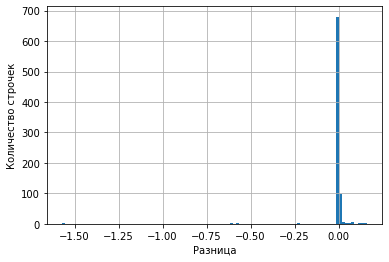

In [40]:
print("Разница столбца total_vaccinations_per_hundred и суммы столбцов people_vaccinated_per_hundred и people_fully_vaccinated_per_hundred")
has_total_vaccinations = vaccinations[~vaccinations['people_vaccinated_per_hundred'].isna()]
ax = (has_total_vaccinations['total_vaccinations_per_hundred'] - has_total_vaccinations['people_vaccinated_per_hundred'] - has_total_vaccinations['people_fully_vaccinated_per_hundred']).hist(bins=100)
ax.set_xlabel('Разница')
ax.set_ylabel('Количество строчек')

Вывод: очень часто столбец `total_vaccinations_per_hundred` является суммой столбцов `people_vaccinated_per_hundred` и `people_fully_vaccinated_per_hundred`. Их разница не превышает $2\%$ населения страны.

Тогда раполним `people_fully_vaccinated` как других двух столбцов.

In [41]:
vaccinations.loc[~vaccinations['total_vaccinations'].isna() &
           ~vaccinations['people_vaccinated'].isna() &
           vaccinations['people_fully_vaccinated'].isna(),
           ["people_fully_vaccinated"]] = vaccinations["total_vaccinations"] - vaccinations["people_vaccinated"]
vaccinations.loc[~vaccinations['total_vaccinations_per_hundred'].isna() &
           ~vaccinations['people_vaccinated_per_hundred'].isna() &
           vaccinations['people_fully_vaccinated_per_hundred'].isna(),
           ["people_fully_vaccinated_per_hundred"]] = vaccinations["total_vaccinations_per_hundred"] - vaccinations["people_vaccinated_per_hundred"]

In [42]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
vaccines_mlb = mlb.fit_transform([vacs.split(', ') for vacs in data_wo_gb.vaccines.values])

In [43]:
data_wo_gb = data_wo_gb.join(pd.DataFrame(vaccines_mlb, columns = mlb.classes_, index=data_wo_gb.index))
data_wo_gb.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,...,source_name,source_website,Covaxin,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,Sinovac,Sputnik V
0,Algeria,DZA,2021-01-29,0.000000,NaN,NaN,91940.767062,75870.0,0.00,NaN,...,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...,0,0,0,0,0,0,0,1
1,Algeria,DZA,2021-01-30,30.000000,NaN,NaN,30.000000,30.0,0.00,NaN,...,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...,0,0,0,0,0,0,0,1
2,Andorra,AND,2021-01-25,576.000000,576.0,NaN,227.822120,188.0,0.75,0.75,...,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...,0,0,0,1,0,0,0,0
3,Andorra,AND,2021-01-26,655.980106,NaN,NaN,79.980106,66.0,0.00,NaN,...,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...,0,0,0,1,0,0,0,0
4,Andorra,AND,2021-01-27,735.960212,NaN,NaN,79.980106,66.0,0.00,NaN,...,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...,0,0,0,1,0,0,0,0


In [44]:
labels = ['Pfizer/BioNTech', 'Covaxin', 'Oxford/AstraZeneca', 'Sinopharm/Wuhan', 'Sputnik V', 'Moderna', 'Sinopharm/Beijing', 'Sinovac']
counts = []

for vac in labels:
    counts.append(data_wo_gb.groupby('country')[vac].max().sum())

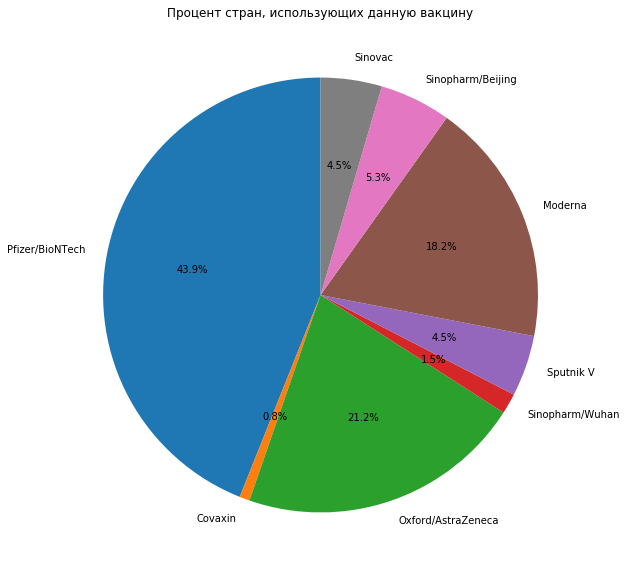

In [45]:
plt.figure(figsize=(10, 10))
plt.title('Процент стран, использующих данную вакцину')
plt.pie(counts, labels=labels,autopct='%1.1f%%', startangle=90)
plt.show()

**Больше всего стран (43,9%) используют вакцину Pfizer/BioNTech, на втором месте (21,2%) - Oxford/AstraZeneca.**

In [46]:
data_wo_gb = data_wo_gb.join(pd.DataFrame(data_wo_gb[vaccines].sum(axis=1), columns=["vaccines_count"]))

In [47]:
data_wo_gb.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,...,source_website,Covaxin,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,Sinovac,Sputnik V,vaccines_count
0,Algeria,DZA,2021-01-29,0.000000,NaN,NaN,91940.767062,75870.0,0.00,NaN,...,https://www.aps.dz/regions/116777-blida-covid-...,0,0,0,0,0,0,0,1,1
1,Algeria,DZA,2021-01-30,30.000000,NaN,NaN,30.000000,30.0,0.00,NaN,...,https://www.aps.dz/regions/116777-blida-covid-...,0,0,0,0,0,0,0,1,1
2,Andorra,AND,2021-01-25,576.000000,576.0,NaN,227.822120,188.0,0.75,0.75,...,https://www.govern.ad/comunicats/item/12379-se...,0,0,0,1,0,0,0,0,1
3,Andorra,AND,2021-01-26,655.980106,NaN,NaN,79.980106,66.0,0.00,NaN,...,https://www.govern.ad/comunicats/item/12379-se...,0,0,0,1,0,0,0,0,1
4,Andorra,AND,2021-01-27,735.960212,NaN,NaN,79.980106,66.0,0.00,NaN,...,https://www.govern.ad/comunicats/item/12379-se...,0,0,0,1,0,0,0,0,1


In [48]:
data_wo_gb.groupby('country').vaccines_count.mean().values

array([1, 1, 1, 3, 2, 1, 2, 1, 1, 2, 3, 2, 1, 2, 3, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 3, 3, 2, 1, 3, 1, 1, 1, 2, 2, 1, 3, 1, 2, 3, 1, 1, 3, 2, 3,
       3, 1, 1, 1, 1, 2, 1, 1, 3, 2, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 2, 1,
       1, 2, 3, 1, 2, 2, 1, 5, 2, 2])

**В каждой стране в среднем использовано от 1 до 5 типов вакцин.**

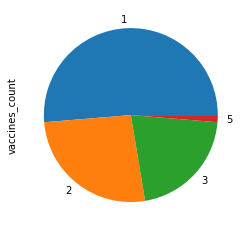

In [49]:
data_wo_gb.groupby('country').vaccines_count.mean().value_counts().plot.pie()

**В среднем большинство стран (более половины) используют один тип вакцины в день.**

In [50]:
countries = np.unique(data_wo_gb.country.values)

In [51]:
from collections import defaultdict

groups_by_country = data_wo_gb.groupby('country').groups

vaccines_by_country = defaultdict(set)
for country in countries:
    idxes = groups_by_country[country]
    for idx in idxes:
        vaccines_by_country[country].update(set(data_wo_gb[data_wo_gb.index == idx].vaccines.values[0].split(", ")))

vaccines_by_country

defaultdict(set,
            {'Algeria': {'Sputnik V'},
             'Andorra': {'Pfizer/BioNTech'},
             'Argentina': {'Sputnik V'},
             'Austria': {'Moderna', 'Oxford/AstraZeneca', 'Pfizer/BioNTech'},
             'Bahrain': {'Pfizer/BioNTech', 'Sinopharm/Beijing'},
             'Bangladesh': {'Oxford/AstraZeneca'},
             'Belgium': {'Moderna', 'Pfizer/BioNTech'},
             'Bermuda': {'Pfizer/BioNTech'},
             'Bolivia': {'Sputnik V'},
             'Brazil': {'Oxford/AstraZeneca', 'Sinovac'},
             'Bulgaria': {'Moderna', 'Oxford/AstraZeneca', 'Pfizer/BioNTech'},
             'Canada': {'Moderna', 'Pfizer/BioNTech'},
             'Cayman Islands': {'Pfizer/BioNTech'},
             'Chile': {'Pfizer/BioNTech', 'Sinovac'},
             'China': {'Sinopharm/Beijing', 'Sinopharm/Wuhan', 'Sinovac'},
             'Costa Rica': {'Pfizer/BioNTech'},
             'Croatia': {'Pfizer/BioNTech'},
             'Cyprus': {'Pfizer/BioNTech'},
             

In [52]:
country_by_vaccines = defaultdict(set)

for country in vaccines_by_country.keys():
    for vac in vaccines_by_country[country]:
        country_by_vaccines[vac].add(country)

country_by_vaccines

defaultdict(set,
            {'Sputnik V': {'Algeria',
              'Argentina',
              'Bolivia',
              'Russia',
              'Serbia',
              'United Arab Emirates'},
             'Pfizer/BioNTech': {'Andorra',
              'Austria',
              'Bahrain',
              'Belgium',
              'Bermuda',
              'Bulgaria',
              'Canada',
              'Cayman Islands',
              'Chile',
              'Costa Rica',
              'Croatia',
              'Cyprus',
              'Czechia',
              'Denmark',
              'Ecuador',
              'Estonia',
              'Faeroe Islands',
              'Finland',
              'France',
              'Germany',
              'Gibraltar',
              'Greece',
              'Greenland',
              'Guernsey',
              'Hungary',
              'Iceland',
              'Ireland',
              'Isle of Man',
              'Israel',
              'Italy',
              'Jers

## Источник данных

Рассморим колонки `source_website` и `source_name`.

In [53]:
for name, group in vaccinations.groupby('source_website'):
    if len(group['country'].unique()) > 1 :
        print(f"{group['country'].unique()} shares {name}")

['England' 'Northern Ireland' 'Scotland' 'United Kingdom' 'Wales'] shares https://coronavirus.data.gov.uk/details/healthcare


Каждое государство имеет свой сайт, на котором делится данными о вакцинации.

In [54]:
for name, group in vaccinations.groupby('source_name'):
    if len(group['country'].unique()) > 1 :
        countries_str = ", ".join(group['country'].unique())
        print(f"{countries_str} делится данными через {name}")

Liechtenstein, Switzerland делится данными через Federal Office of Public Health
England, Northern Ireland, Scotland, United Kingdom, Wales делится данными через Government of the United Kingdom
Algeria, Argentina, Austria, Bahrain, Bolivia, Bulgaria, Croatia, Cyprus, Czechia, Egypt, Greece, India, Indonesia, Kuwait, Lithuania, Malta, Morocco, Myanmar, Northern Cyprus, Oman, Panama, Poland, Singapore, Slovakia, Spain, Sri Lanka делится данными через Ministry of Health
China, Costa Rica делится данными через National Health Commission
Latvia, Portugal делится данными через National Health Service
